<a href="https://colab.research.google.com/github/kiranjhmat/credit_card_fraud_detection/blob/main/Credit_card_fraud_detection_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import the dataset

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/creditcard.csv')

# Shape of data

In [4]:
data.shape

(284807, 31)

# Display maximum columns

In [5]:
pd.pandas.set_option('display.max_columns',None)

# Display the data

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Display the data type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Display sum of null values

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Heatmap of dataset

<Axes: >

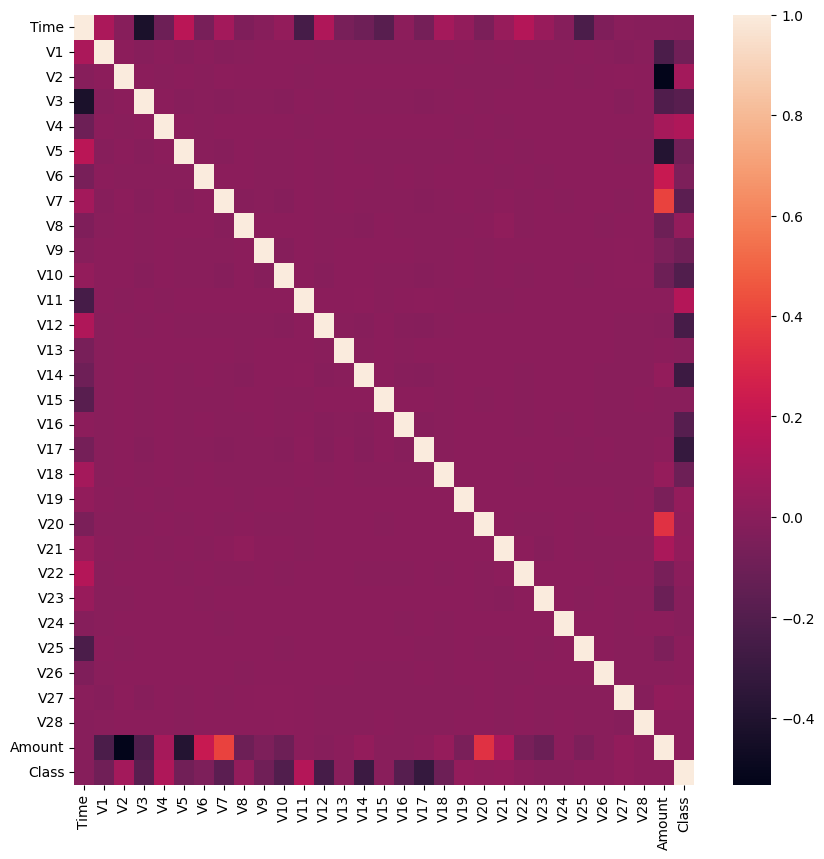

In [30]:
figure=plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

# Sum of duplication

In [11]:
data.duplicated().sum()

1081

# Drop the duplicate data

In [12]:
data.drop_duplicates(data,inplace=True)

# Describe the numeric feature

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# Distribution of legit transaction and fraudlent transaction

In [14]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

# Histogram plot for distribution

<Axes: xlabel='Class', ylabel='Count'>

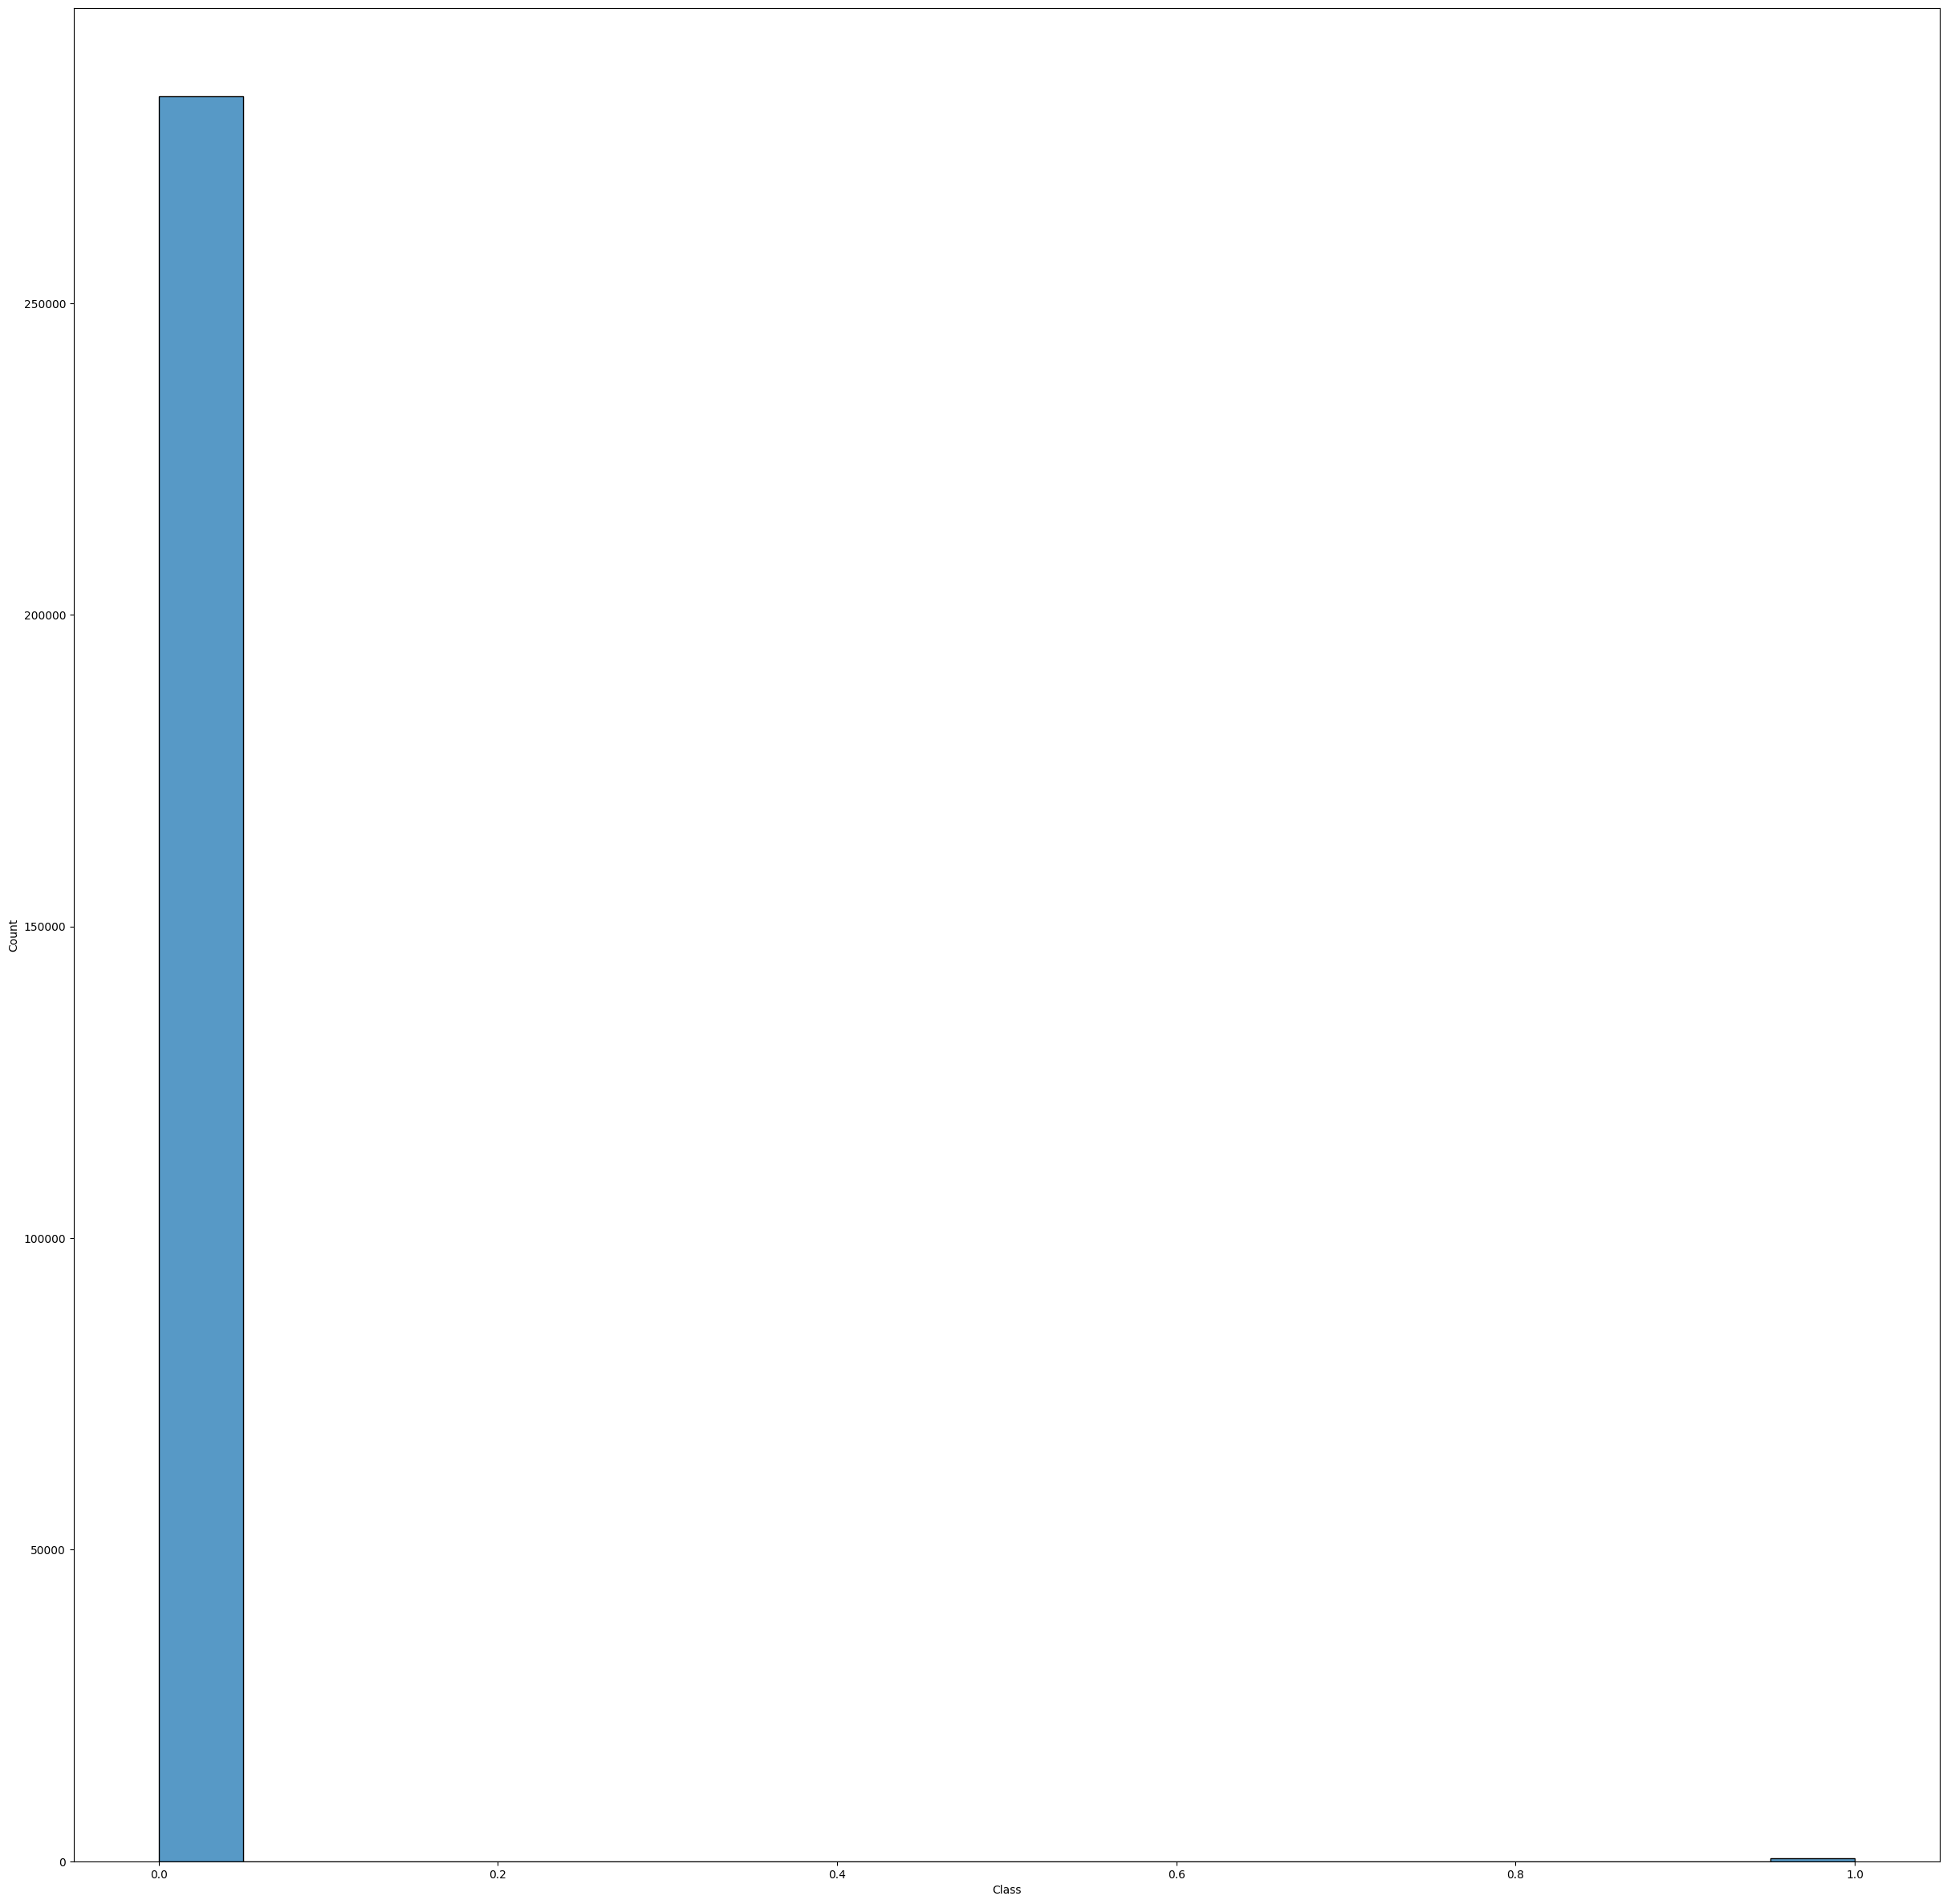

In [15]:
figure=plt.figure(figsize=(30,30))
sns.histplot(data=data, x="Class")



  

*   0 - Not Fraud
*   1 - Fraud





# Separating the data for analysis

In [16]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

# Satistical measures of data

In [17]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Here our data is highly imbalanced so we will be using the under sampling method to balance the data. we build the sample data using legit data.Since there are 283253 legit transactions, we have to randomly pick about 473 random elements from the legit class to balance out with the fraud dataset, which has just 473 elements:





In [20]:
legit_data = legit.sample(n=473)

# Concatenate legit and fraud dataset

In [21]:
new_data=pd.concat([legit_data,fraud],axis=0)

In [22]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131677,79693.0,0.368444,1.865130,-2.074255,1.602935,0.813936,-1.250355,0.433457,0.403734,-0.826455,-1.293817,2.712095,0.474484,-0.043415,-3.017528,0.555970,0.793271,3.082663,1.504028,-0.564003,-0.028644,-0.010309,0.105439,0.173772,-0.117075,-0.559500,-0.399758,0.146950,-0.059070,0.89,0
148591,90068.0,0.248130,0.830662,-0.536802,-0.362837,1.264714,-0.805315,0.876355,-0.407848,1.727586,-0.760632,0.029968,-3.083269,1.001098,0.288305,-0.925017,0.347448,0.893944,0.156729,-0.453714,-0.068582,-0.534357,-1.020178,0.144499,0.291343,-0.786538,-0.019646,-0.071903,-0.163261,8.99,0
228015,145319.0,0.307803,-1.348636,0.893672,-2.419119,-0.836392,-0.089028,-0.638106,-0.433727,-0.549375,1.676242,-1.359126,-1.263615,0.341797,-1.451330,-0.447628,-0.252528,-0.147322,0.453141,-0.504161,-0.446151,-0.024321,0.855586,0.482752,0.702606,-2.489184,-0.704933,-0.094879,-0.039120,54.00,0
131654,79683.0,-0.400990,1.084480,1.399574,0.089003,0.032833,-0.704645,0.623895,0.058245,-0.384101,-0.548244,0.259708,-0.016390,-0.203702,-0.333218,1.148393,0.006278,0.419287,-0.664726,-0.570339,0.051101,-0.218857,-0.534329,0.053346,0.342452,-0.286040,0.082238,0.261677,0.097437,1.78,0
27452,34552.0,1.189426,-0.152579,0.437791,0.379281,-0.458477,-0.148401,-0.216916,0.023703,0.416252,-0.153137,0.728701,1.288732,0.321977,-0.103866,-1.059137,-0.117813,-0.257270,-0.058487,0.725254,-0.028182,-0.052785,0.047749,-0.151747,0.104616,0.560345,0.670717,-0.038102,-0.002824,23.00,0


In [23]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [24]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95004.257928,-0.110286,-0.108835,-0.104518,-0.079078,0.007480,-0.014162,0.021389,-0.035440,0.001271,-0.019336,0.011109,-0.019169,-0.022496,-0.024231,0.04536,-0.032531,0.074268,0.050115,0.028214,0.017298,0.042642,0.009703,0.015369,-0.044034,0.031556,0.030993,-0.001429,-0.003048,109.063636
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.07283,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


<Axes: xlabel='Class', ylabel='Count'>

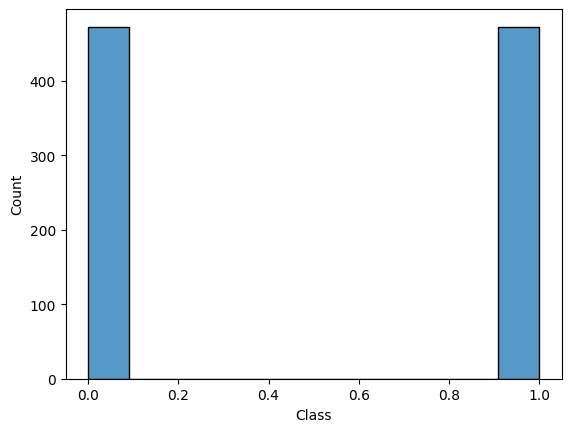

In [25]:
sns.histplot(data=new_data,x="Class")

# Spliting the data into features and targets

In [26]:
X = new_data.drop(columns='Class', axis=1)
y = new_data['Class']

In [27]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
131677   79693.0  0.368444  1.865130 -2.074255  1.602935  0.813936 -1.250355   
148591   90068.0  0.248130  0.830662 -0.536802 -0.362837  1.264714 -0.805315   
228015  145319.0  0.307803 -1.348636  0.893672 -2.419119 -0.836392 -0.089028   
131654   79683.0 -0.400990  1.084480  1.399574  0.089003  0.032833 -0.704645   
27452    34552.0  1.189426 -0.152579  0.437791  0.379281 -0.458477 -0.148401   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [35]:
print(y)

131677    0
148591    0
228015    0
131654    0
27452     0
141408    0
201112    0
249479    0
200611    0
30303     0
143342    0
104107    0
17384     0
170948    0
25922     0
193119    0
119208    0
128486    0
31465     0
266545    0
236289    0
115954    0
77045     0
265223    0
194588    0
208100    0
88095     0
26529     0
53700     0
177274    0
179837    0
60498     0
141700    0
180633    0
114180    0
39776     0
200960    0
21753     0
179915    0
197342    0
69401     0
252045    0
80204     0
29942     0
48929     0
264048    0
105565    0
30708     0
278407    0
95973     0
39324     0
87890     0
106259    0
115492    0
262510    0
121896    0
24600     0
21355     0
55254     0
23745     0
171633    0
172226    0
28450     0
242156    0
175550    0
134708    0
38100     0
272220    0
151230    0
212585    0
27642     0
113031    0
7927      0
234909    0
134319    0
57151     0
167847    0
212288    0
64877     0
149491    0
222805    0
148759    0
16384     0
9532